In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Clean display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

In [27]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv("gender_submission.csv")

# Quick glance
print(train.shape)
print(train.head())

(891, 12)
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN    

In [9]:
cols_to_drop = ['Cabin', 'Ticket']

# Drop only if they exist
train = train.drop(columns=[col for col in cols_to_drop if col in train.columns])

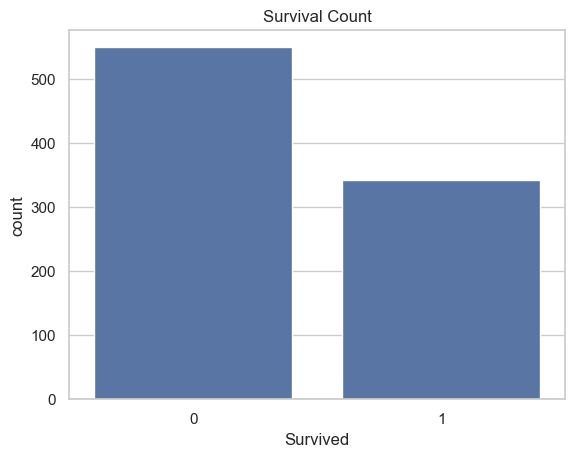

In [11]:
sns.countplot(x='Survived', data=train)
plt.title("Survival Count")
plt.show()

In [13]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked'],
      dtype='object')


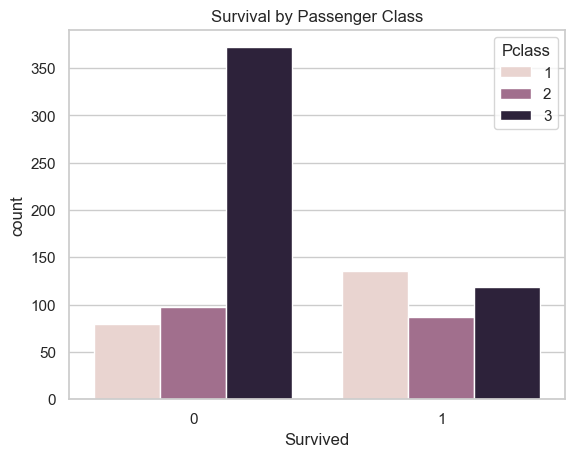

In [15]:
sns.countplot(x='Survived', hue='Pclass', data=train)
plt.title("Survival by Passenger Class")
plt.show()

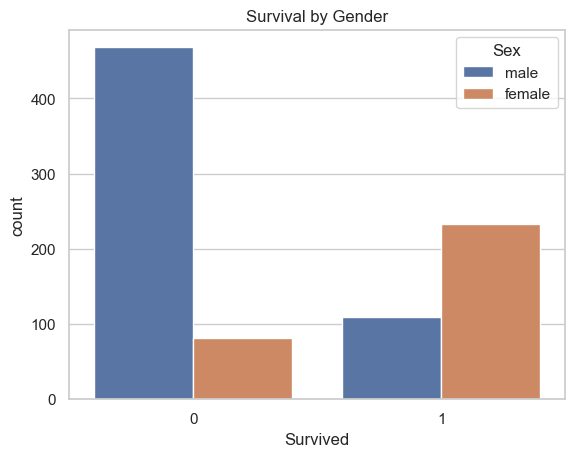

In [17]:
sns.countplot(x='Survived', hue='Sex', data=train)
plt.title("Survival by Gender")
plt.show()

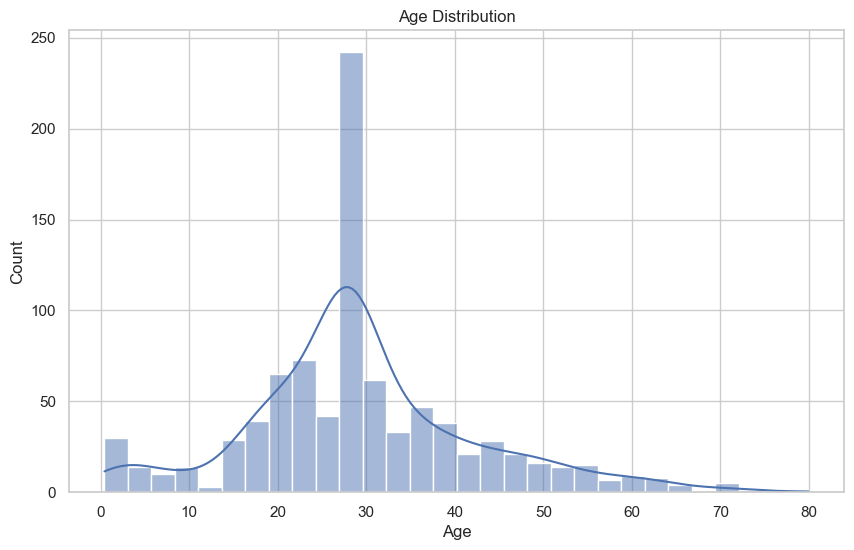

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(train['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

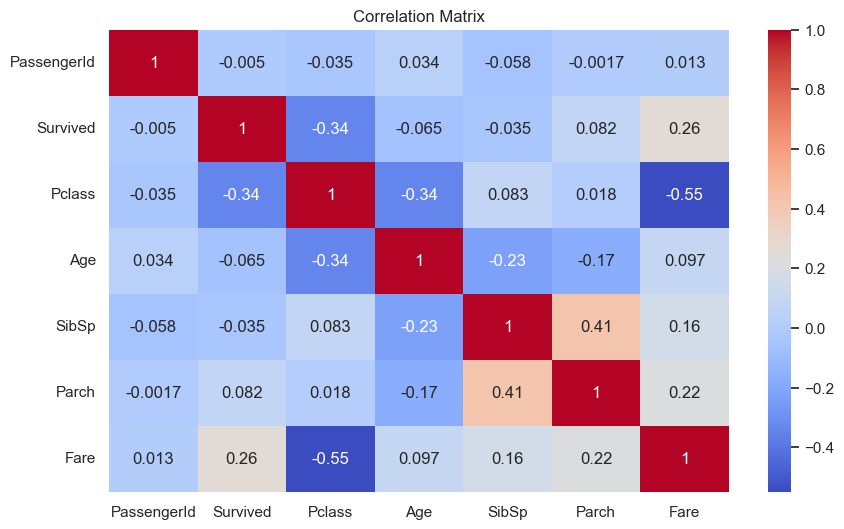

In [23]:
plt.figure(figsize=(10,6))

# Select only numeric columns for correlation
numeric_data = train.select_dtypes(include='number')

# Plot heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

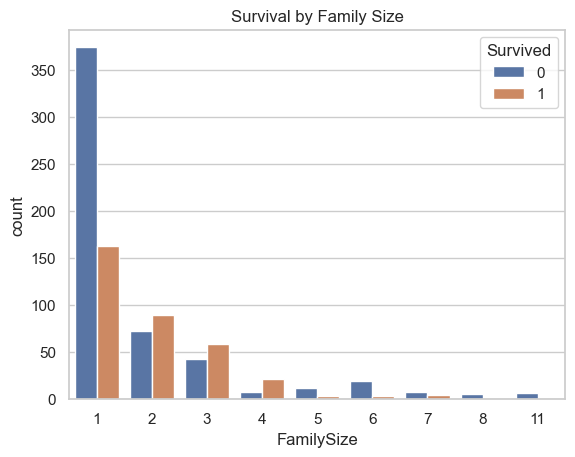

In [25]:
# Create 'FamilySize' feature
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
sns.countplot(x='FamilySize', hue='Survived', data=train)
plt.title("Survival by Family Size")
plt.show()